In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

SP_census = pd.read_csv('CensoSP.csv', sep=';', skiprows=5)

SP_census.drop('12.1.1.1.1', axis=1, inplace=True)
SP_census = SP_census[SP_census.index > 322]

SP_census.rename(columns={"Religião": "Religion", "Unnamed: 2": "Est. Population"}, inplace=True)
SP_census.drop('Unnamed: 3', axis=1, inplace=True)
SP_census = SP_census.dropna()
SP_census.drop([323, 334, 336, 344, 362, 364], axis=0, inplace=True)
SP_census.at[335, 'Religion'] = 'misc evangelical'
SP_census.at[343, 'Religion'] = 'misc missionary'
SP_census.at[356, 'Religion'] = 'mis petencostal'
SP_census.at[366, 'Religion'] = 'oriental religions'
top_30_SP2010 = SP_census.nlargest(30, 'Est. Population')
top_30_SP2010.reset_index(drop=True, inplace=True)
top_10_SP2010 = top_30_SP2010.sort_values(by=['Est. Population'], ascending=False)[:10]


br_xls = pd.read_excel('CensoBR.xlsx', skiprows=4)

def replace_header(df):
    year = df.columns[0]
    df.columns = df.iloc[0]
    df = df.iloc[:, :-1]
    df = df[1:]
    df = df.dropna()
    df['Year'] = year
    df.set_index(['Year'], inplace=True)
    return df

BR1991 = replace_header(br_xls.loc[:, '1991': '2000'])
BR2000 = replace_header(br_xls.loc[:, '2000': '2010'])
BR2010 = replace_header(br_xls.loc[:, '2010':])
frames = [BR1991,BR2000,BR2010]

BR_census = pd.concat(frames)
BR_census = BR_census.replace('...', 0)

top_30_BR1991 = BR_census.loc['1991'].sort_values(ascending=False)[1:30] #14
top_30_BR2000 = BR_census.loc['2000'].sort_values(ascending=False)[1:30]
top_30_BR2010 = BR_census.loc['2010'].sort_values(ascending=False)[1:30]

In [3]:
BR_df = pd.concat([top_30_BR1991, top_30_BR2000, top_30_BR2010], axis=1)

BR_df = BR_df.fillna(0)
BR_df['1991']['Católica Apostólica Romana'] = BR_df['1991']['Católica Romana']
BR_df.drop('Católica Romana', axis=0, inplace=True)
BR_df['mean'] = BR_df.mean(axis=1)

BR_df = BR_df.sort_values('mean', ascending=False)
BR_df = BR_df[BR_df['mean'] > 0]
BR_df.drop('mean', axis=1, inplace=True)


top_15_BR = BR_df.copy()
top_15_BR.drop('1991', axis=1, inplace=True)
top_15_BR.drop('2000', axis=1, inplace=True)


top_15_BR['Religion'] = top_15_BR.index
top_15_BR.reset_index(inplace=True, drop=True)
top_15_BR.rename(columns={"2010": "Est. Population"}, inplace=True)

top_15_BR.drop([5], inplace=True)
top_10BR2010 = top_15_BR.sort_values(by=['Est. Population'], ascending=False)[:10]
top_10BR2010.reset_index(inplace=True, drop=True)

translation_sp = ['Catolic Roman', 'No Religion', 'Evangelical', 'God Assembly', 'Spiritualist', 'Petencostal', 'Brazilian cristian group',
 'Other cristian', 'Universal church', 'Baptist'
]

for i in range(len(top_10_SP2010['Religion'])):
    top_10_SP2010['Religion'][i] = translation_sp[i]

translation_br = ['Catolic Roman', 'Evangelical', 'Petencostal', 'No Religion', 'God Assembly', 'Non-determined evangelical',
'Spiritualist', 'Missionary', 'Other petencostal', 'Spiritualistic', 'Baptist']

for i in range(len(top_10BR2010['Religion'])):
    top_10BR2010['Religion'][i] = translation_br[i]


/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
top_10BR2010

,Est. Population,Religion
0,123280172.0,Catolic Roman
1,42275440.0,Evangelical
2,25370484.0,Petencostal
3,15335510.0,No Religion
4,12314410.0,God Assembly
5,9218129.0,Non-determined evangelical
6,7686827.0,Spiritualist
7,5267029.0,Missionary
8,3848876.0,Other petencostal
9,3723853.0,Spiritualistic


In [4]:
top_10_SP2010

,Religion,Est. Population
0,Catolic Roman,6549775.0
1,No Religion,964994.0
2,Evangelical,797853.0
3,God Assembly,533362.0
4,Spiritualist,531822.0
5,Petencostal,429598.0
6,Brazilian cristian group,199565.0
7,Other cristian,149628.0
8,Universal church,126228.0
9,Baptist,117653.0


<IPython.core.display.Javascript object>


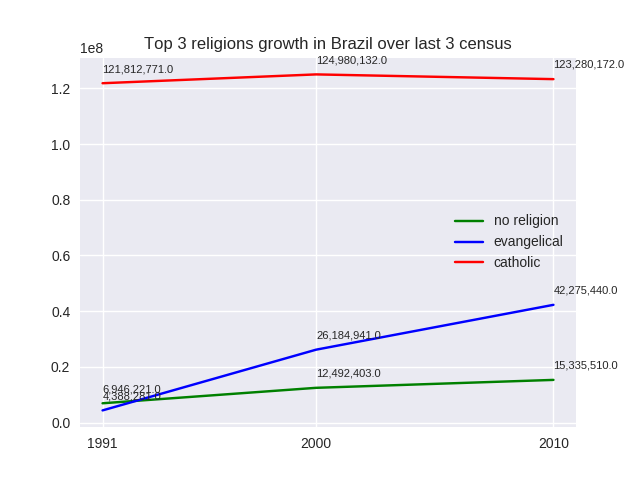

In [4]:
import seaborn as sns

years_df = BR_df.copy()


years_df['1991']['Evangélicas'] = 4388281.0
catholic = years_df.loc['Católica Apostólica Romana']
evangelical = years_df.loc['Evangélicas']
no_religion = years_df.loc['Sem religião']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(no_religion, color='g', label='no religion')
ax1.plot(evangelical, color='b', label='evangelical')
ax1.plot(catholic, color='r', label='catholic')

data = [no_religion, evangelical,catholic]
plt.legend()
years = [1991,2000,2010]
plt.xticks(years)
plt.title('Top 3 religions growth in Brazil over last 3 census')

for rel in data:
    for i,j in zip(years, rel):
        human_readable_number = "{:,}".format(j)
        text= ax1.annotate(str(human_readable_number),xy=(i,(j + 4000000)))
        text.set_fontsize(8)


<IPython.core.display.Javascript object>


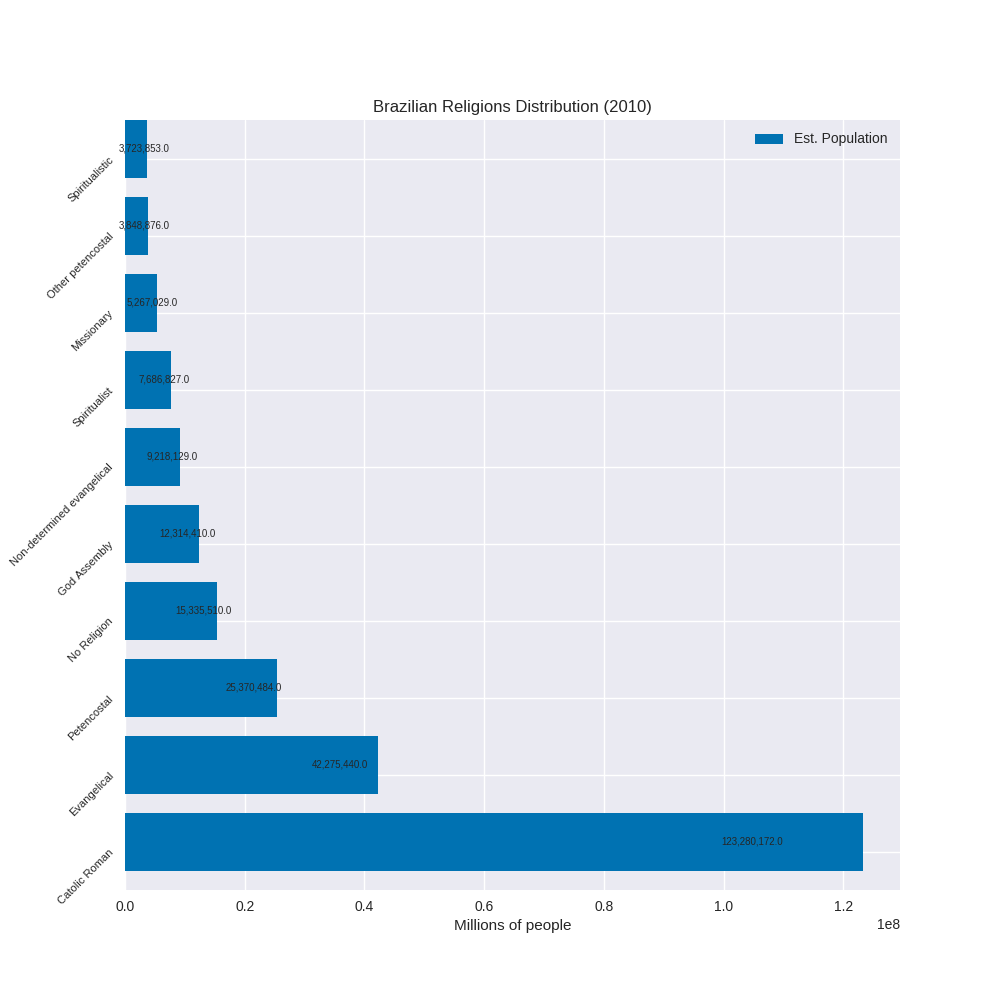

In [5]:
import matplotlib.pyplot as plt

%matplotlib notebook
plt.style.use('seaborn-colorblind')


ax = top_10BR2010.plot('Religion', 'Est. Population', kind='barh', figsize=(10,10), title='Brazilian Religions Distribution (2010)',
                sort_columns=True,legend='reverse');

    
for rect in ax.patches:
    if (rect.get_width() > 0):
        rect.set_height(rect.get_height() * 1.5)
        bl = rect.get_xy()
        x = 0.85 * rect.get_width() + bl[0]
        y = 0.5*rect.get_height() + bl[1]
        l = rect.get_width()
        human_readable_number = "{:,}".format(l)
        ax.text(x, y, human_readable_number, ha='center',va='center',fontsize=7)

        
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

plt.gca().set_yticklabels(labels)

y = plt.gca().get_yticklabels()
for item in y:
    item.set_rotation(45)
    item.set_fontsize(8)

plt.xlabel('Millions of people')
plt.ylabel('')


<IPython.core.display.Javascript object>


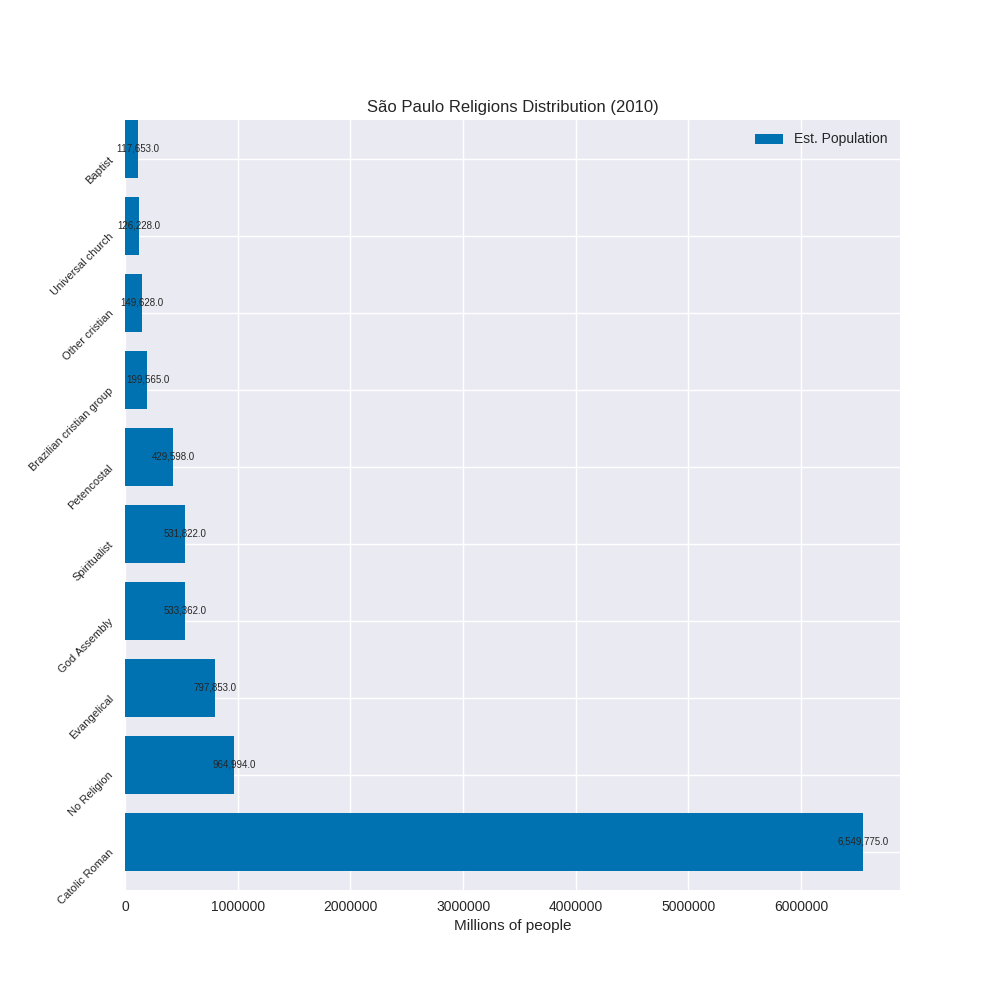

In [6]:

ax = top_10_SP2010.plot('Religion', 'Est. Population', kind='barh', figsize=(10,10), title='São Paulo Religions Distribution (2010)',
                sort_columns=True,legend=True);


for rect in ax.patches:
    if (rect.get_width() > 0):
        rect.set_height(rect.get_height() * 1.5)
        bl = rect.get_xy()
        x =  rect.get_width() + bl[0]
        y = 0.5*rect.get_height() + bl[1]
        human_readable_number = "{:,}".format(rect.get_width())
        ax.text(x, y, human_readable_number, ha='center',va='center',fontsize=7)

        
labels = [item.get_text() for item in plt.gca().get_yticklabels()]

plt.gca().set_yticklabels(labels)

y = plt.gca().get_yticklabels()
for item in y:
    item.set_rotation(45)
    item.set_fontsize(8)


plt.xlabel('Millions of people')
plt.ylabel('')

<IPython.core.display.Javascript object>


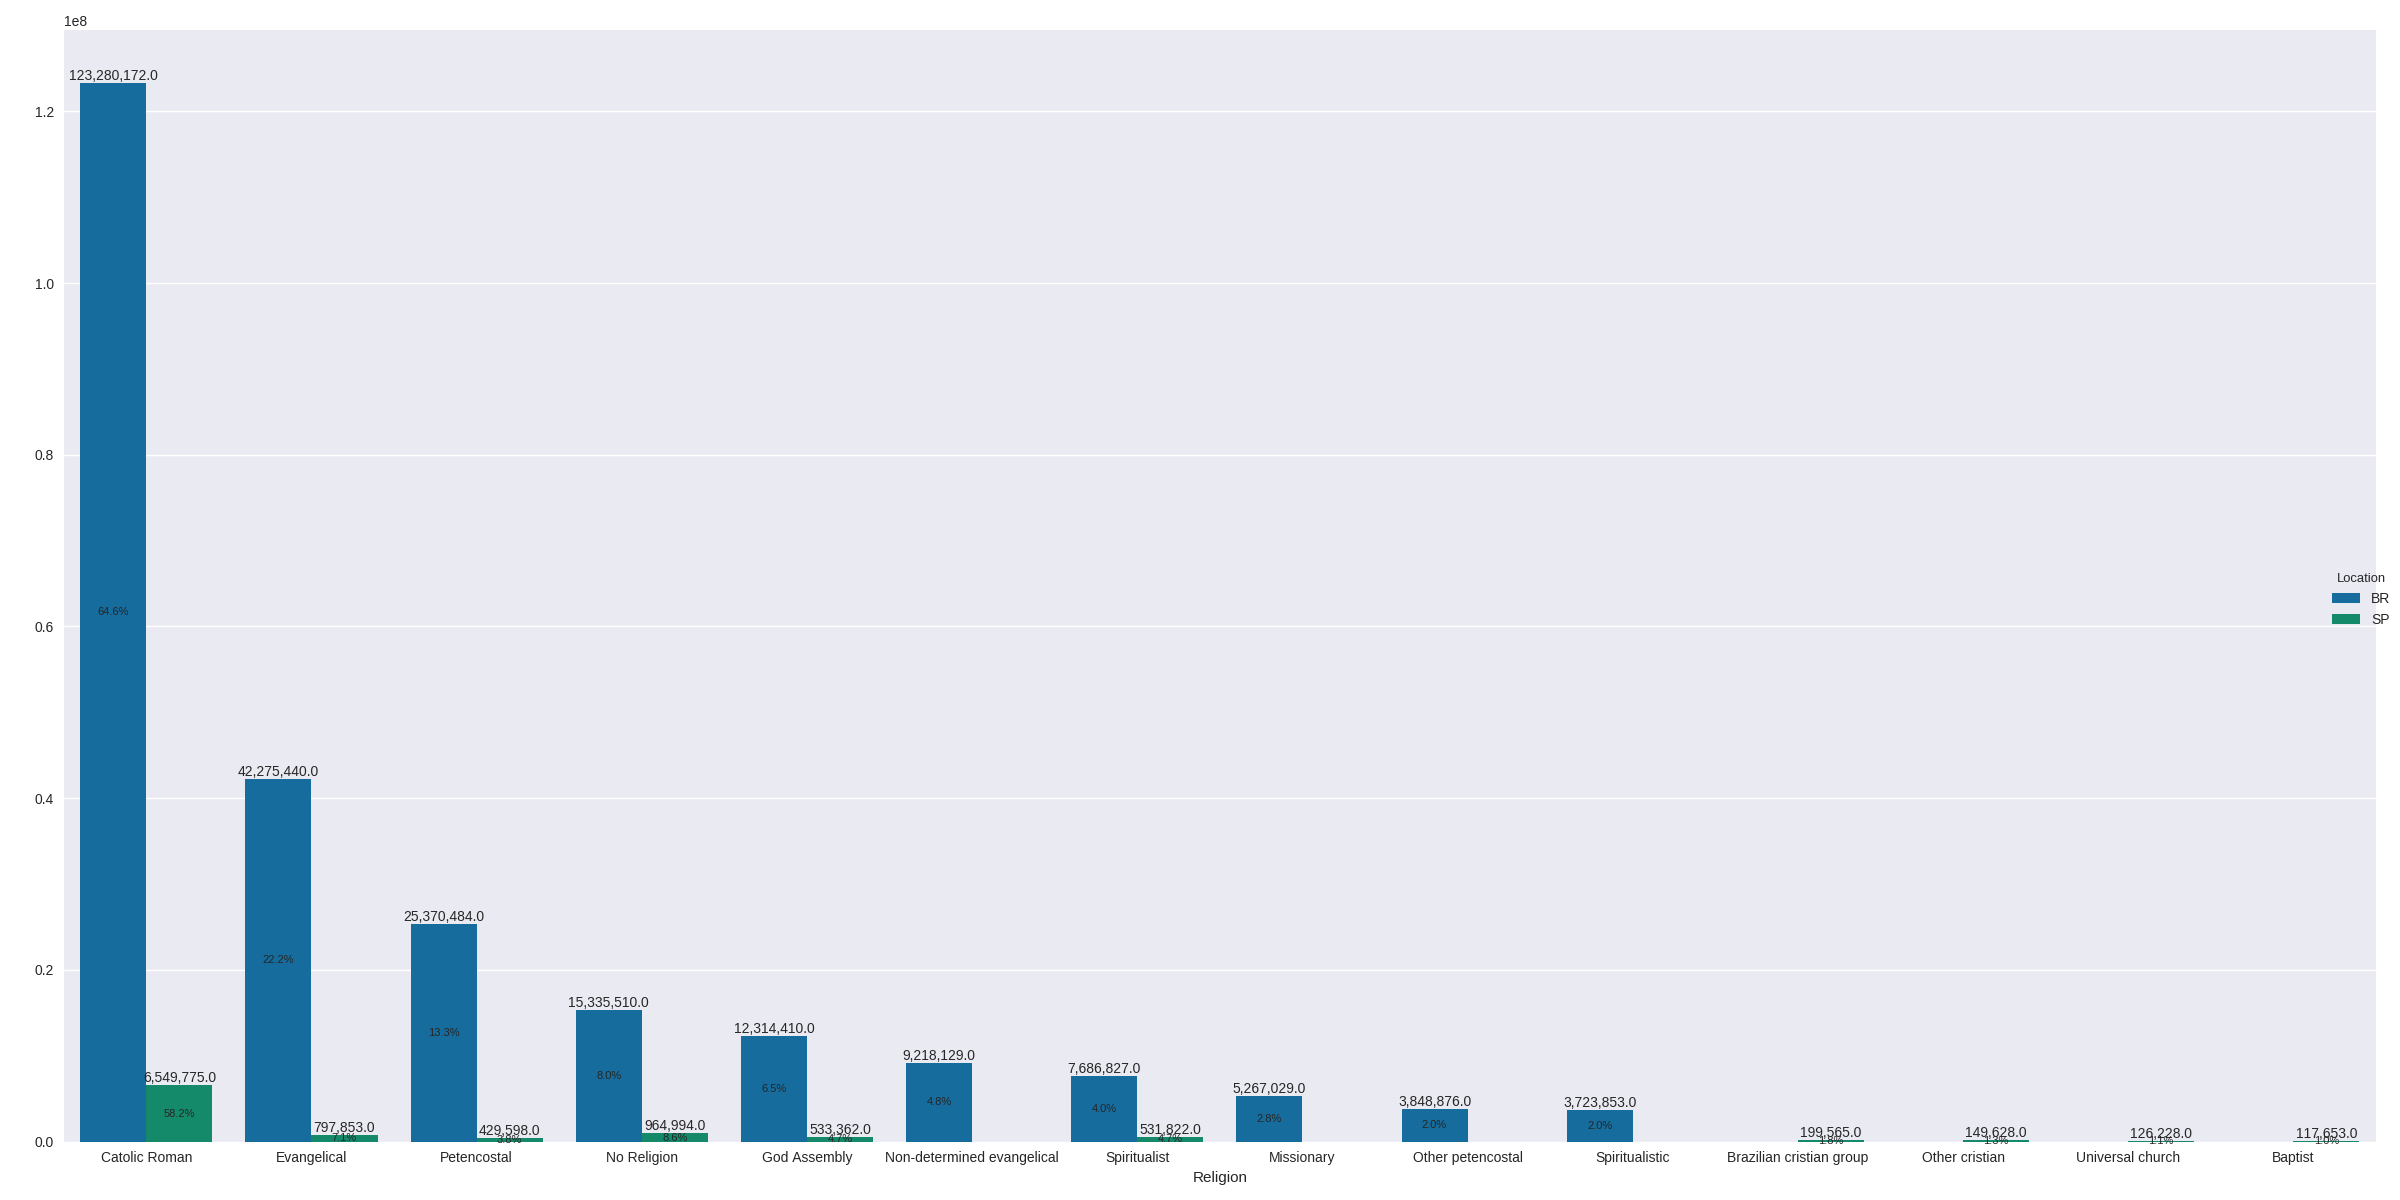

<IPython.core.display.Javascript object>


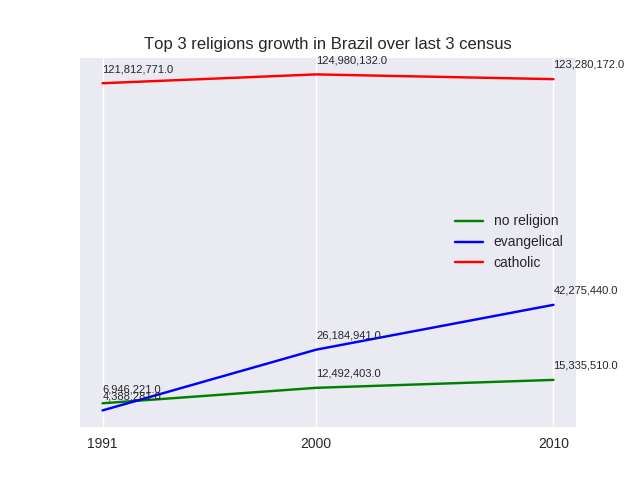

In [7]:
import math

top_10BR2010['Location'] = 'BR'
top_10_SP2010['Location'] = 'SP'
compare_df = pd.concat([top_10BR2010, top_10_SP2010])
compare_df = compare_df.reset_index(drop=True)

BR = compare_df.loc[compare_df['Location'] == 'BR']
SP = compare_df.loc[compare_df['Location'] == 'SP']

sns.factorplot(x='Religion', y='Est. Population', hue='Location', data=compare_df, kind='bar', size=12, aspect=2)

ax = plt.gca()

has_none = False
#Iterate through the list of axes' patches
for idx, p in enumerate(ax.patches):
    human_readable_number = "{:,}".format(p.get_height())
    
    #percentage_overall = "{%d%}".format(p.get_height())
    if human_readable_number != 'nan':
            if not has_none:
                percentage_overall = '{:.1%}'.format(p.get_height()/190755799)
            else:
                percentage_overall = '{:.1%}'.format(p.get_height()/11253503)
            ax.text(p.get_x() + p.get_width()/2., p.get_height(), human_readable_number, fontsize=10, ha='center', va='bottom')
            ax.text(p.get_x() + p.get_width()/2., p.get_height()/2, percentage_overall, fontsize=8, ha='center', va='center')
    else:
        has_none = True
       
    

plt.ylabel('Millions of people')
plt.ylabel('')

years_df = BR_df.copy()
years_df['1991']['Evangélicas'] = 4388281.0
catholic = years_df.loc['Católica Apostólica Romana']
evangelical = years_df.loc['Evangélicas']
no_religion = years_df.loc['Sem religião']

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(no_religion, color='g', label='no religion')
ax1.plot(evangelical, color='b', label='evangelical')
ax1.plot(catholic, color='r', label='catholic')

data = [no_religion, evangelical,catholic]
plt.legend()
years = [1991,2000,2010]
plt.xticks(years)
plt.yticks([])
plt.title('Top 3 religions growth in Brazil over last 3 census')

# for i,j in zip(x,y):
#     ax.annotate(str(j),xy=(i,j))

for rel in data:
    for i,j in zip(years, rel):
        human_readable_number = "{:,}".format(j)
        text= ax1.annotate(str(human_readable_number),xy=(i,(j + 4000000)))
        text.set_fontsize(8)


